In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Accomodation Survey - Form Responses 1.csv")

In [3]:
print("original shape" , df.shape)

original shape (29, 15)


In [4]:
print("column names")
df.columns.tolist()

column names


['Timestamp',
 'Column 2',
 'Name',
 'Type of Accomodation',
 'Monthly Rent',
 'Distance to colledge ( in km )',
 'Average Daily commute time (minutes) ',
 'Food provided',
 'Internet Quality ( 1 : no internet , 2 : poor , 3: medium , 4 : good , 5 : excellent )',
 'Room Sharing',
 'Privacy level ',
 'Cleaniless satisafction',
 'Nosie level ',
 'overall Satisfaction',
 'Additional Comments']

In [5]:
df = df.drop(["Timestamp" , "Column 2" , "Additional Comments"] , axis = 1 )

In [6]:
df.columns.tolist()

['Name',
 'Type of Accomodation',
 'Monthly Rent',
 'Distance to colledge ( in km )',
 'Average Daily commute time (minutes) ',
 'Food provided',
 'Internet Quality ( 1 : no internet , 2 : poor , 3: medium , 4 : good , 5 : excellent )',
 'Room Sharing',
 'Privacy level ',
 'Cleaniless satisafction',
 'Nosie level ',
 'overall Satisfaction']

In [7]:
df.columns = ["Name", "Accomodation_Type" , "Monthly_Rent" , "Distance_km" , "Commute_Time_min" , "Food_Provided" , "Internet_Quality" , "Room_Sharing" , "Privacy_Level" , "Cleanliness_Satisfaction", "Noise_Level" , "Overall_Satisfaction"]

In [8]:
df.columns.tolist()

['Name',
 'Accomodation_Type',
 'Monthly_Rent',
 'Distance_km',
 'Commute_Time_min',
 'Food_Provided',
 'Internet_Quality',
 'Room_Sharing',
 'Privacy_Level',
 'Cleanliness_Satisfaction',
 'Noise_Level',
 'Overall_Satisfaction']

In [9]:
df["Monthly_Rent"] = pd.to_numeric(df["Monthly_Rent"] , errors = "coerce")

In [10]:
# df["Distance_km"] = pd.to_numeric(df["Distance_km"], errors = "coerce")
# df["Commute_Time_min"] = pd.to_numeric(df["Commute_Time_min"] , errors= "coerce")
# df["Internet_Quality"] = pd.to_numeric(df["Internet_Quality"], errors="coerce")
# df["Privacy_Level"] = pd.to_numeric(df["Privacy_Level"], errors="coerce")
# df["Cleanliness_Satisfaction"] = pd.to_numeric(df["Cleanliness_Satisfaction"], errors="coerce")
# df["Noise_Level"] = pd.to_numeric(df["Noise_Level"], errors="coerce")
# df["Overall_Satisfaction"] = pd.to_numeric(df["Overall_Satisfaction"], errors="coerce")

In [11]:
print(df["Food_Provided"])
df["Food_Provided"] = df["Food_Provided"].map({"Yes":1 , "No" : 0})

0     Yes
1     Yes
2      No
3     Yes
4     Yes
5      No
6      No
7     Yes
8     Yes
9     Yes
10     No
11    Yes
12    Yes
13    Yes
14    Yes
15     No
16     No
17     No
18     No
19    Yes
20    Yes
21    Yes
22    Yes
23    Yes
24     No
25    Yes
26    Yes
27    Yes
28    Yes
Name: Food_Provided, dtype: object


In [12]:
df["Food_Provided"]

0     1
1     1
2     0
3     1
4     1
5     0
6     0
7     1
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
Name: Food_Provided, dtype: int64

In [13]:
# createing derived metrics for business insights
df["Value_Score"] = df["Overall_Satisfaction"]/(df["Monthly_Rent"] / 1000)

In [14]:
df["Value_Score"]

0     0.400000
1     0.500000
2     0.250000
3     0.666667
4     0.400000
5     0.278843
6     0.270270
7     0.400000
8     0.200000
9     0.470588
10    0.400000
11    0.333333
12    0.394737
13    0.500000
14    0.384615
15    0.307692
16    0.307692
17    1.142857
18    0.888889
19    0.300000
20    0.461538
21    0.200000
22    0.500000
23    0.200000
24    0.888889
25    0.400000
26    0.461538
27    0.200000
28    0.500000
Name: Value_Score, dtype: float64

In [15]:
df["Convenience_Score"] = 5 - (df["Distance_km"] * 0.5 + df["Commute_Time_min"] * 0.1)

In [16]:
df["Convenience_Score"] 
#satisfaction per 1000 rs

0     4.750
1     4.850
2     3.250
3     4.250
4     2.500
5     2.570
6    -0.430
7     3.720
8    -0.440
9     3.680
10    4.650
11    4.600
12    3.600
13    4.600
14    4.450
15    2.550
16    2.550
17    3.400
18    3.850
19    4.650
20    1.950
21    4.700
22    4.600
23    4.525
24    2.900
25    3.500
26    2.000
27    4.575
28    4.700
Name: Convenience_Score, dtype: float64

In [17]:
df["Amenity_Score"] = (df["Internet_Quality"] + df["Privacy_Level"] + df["Cleanliness_Satisfaction"])/3 

In [18]:
df["Amenity_Score"]
#higher is better

0     4.000000
1     4.666667
2     4.000000
3     2.000000
4     4.000000
5     2.333333
6     1.666667
7     3.000000
8     4.666667
9     2.666667
10    3.666667
11    4.000000
12    3.000000
13    4.000000
14    5.000000
15    4.000000
16    4.000000
17    2.666667
18    3.333333
19    3.333333
20    2.666667
21    3.666667
22    4.000000
23    3.333333
24    3.333333
25    2.333333
26    1.666667
27    4.000000
28    4.000000
Name: Amenity_Score, dtype: float64

In [19]:
df["Accomodation_Type"]

0     Hostel
1     Hostel
2       Flat
3         PG
4       Flat
5       Flat
6       Flat
7         PG
8       Flat
9         PG
10    Hostel
11    Hostel
12        PG
13    Hostel
14    Hostel
15      Flat
16      Flat
17        PG
18        PG
19    Hostel
20        PG
21    Hostel
22    Hostel
23    Hostel
24        PG
25        PG
26        PG
27    Hostel
28    Hostel
Name: Accomodation_Type, dtype: object

In [20]:
rent_q99 = df["Monthly_Rent"].quantile(0.99)
df["Monthly_Rent"] = df["Monthly_Rent"].clip(upper = rent_q99)

In [21]:
df["Monthly_Rent"]

0     10000
1     10000
2     12000
3      4500
4     10000
5     14345
6     18500
7      7500
8     19580
9      8500
10    10000
11    12000
12     7600
13    10000
14    13000
15    13000
16    13000
17     3500
18     4500
19    10000
20     6500
21    10000
22    10000
23    10000
24     4500
25     5000
26     6500
27    10000
28    10000
Name: Monthly_Rent, dtype: int64

In [22]:
rent_q99

np.float64(19580.0)

In [23]:
summary_stats = df.groupby("Accomodation_Type").agg({
    "Monthly_Rent" : ["mean" , "median"] , 
    "Overall_Satisfaction" : ["mean" , "count"] , 
    "Value_Score" : "mean" , 
    "Distance_km" : "mean" , 
    "Internet_Quality" : "mean" , 
}).round(2)

In [24]:
summary_stats


Monthly_Rent          Overall_Satisfaction        \
                          mean   median                 mean count   
Accomodation_Type                                                    
Flat                  14346.43  13000.0                 4.00     7   
Hostel                10416.67  10000.0                 3.83    12   
PG                     5860.00   5750.0                 3.30    10   

                  Value_Score Distance_km Internet_Quality  
                         mean        mean             mean  
Accomodation_Type                                           
Flat                     0.29        2.47             3.71  
Hostel                   0.37        0.22             4.42  
PG                       0.62        1.15             2.20

In [25]:
len(df)

29

In [26]:
df["Overall_Satisfaction"].mean()

np.float64(3.689655172413793)

In [27]:
df["Monthly_Rent"].mean()

np.float64(9793.965517241379)

In [28]:
df.to_csv("cleaned_accomodation_data.csv")

In [29]:
correlations = df[["Monthly_Rent" , "Distance_km" , "Internet_Quality" , "Privacy_Level" , "Cleanliness_Satisfaction" , "Overall_Satisfaction"]].corr()["Overall_Satisfaction"].sort_values(ascending = False)

In [30]:
correlations

Overall_Satisfaction        1.000000
Monthly_Rent                0.336685
Privacy_Level               0.299353
Cleanliness_Satisfaction    0.272475
Internet_Quality            0.135648
Distance_km                 0.088217
Name: Overall_Satisfaction, dtype: float64

In [31]:
for factor , corr in correlations.items() : 
    if factor != "Overall_Satisfaction" :
        print(f"{factor}:{corr:.3f}")

Monthly_Rent:0.337
Privacy_Level:0.299
Cleanliness_Satisfaction:0.272
Internet_Quality:0.136
Distance_km:0.088


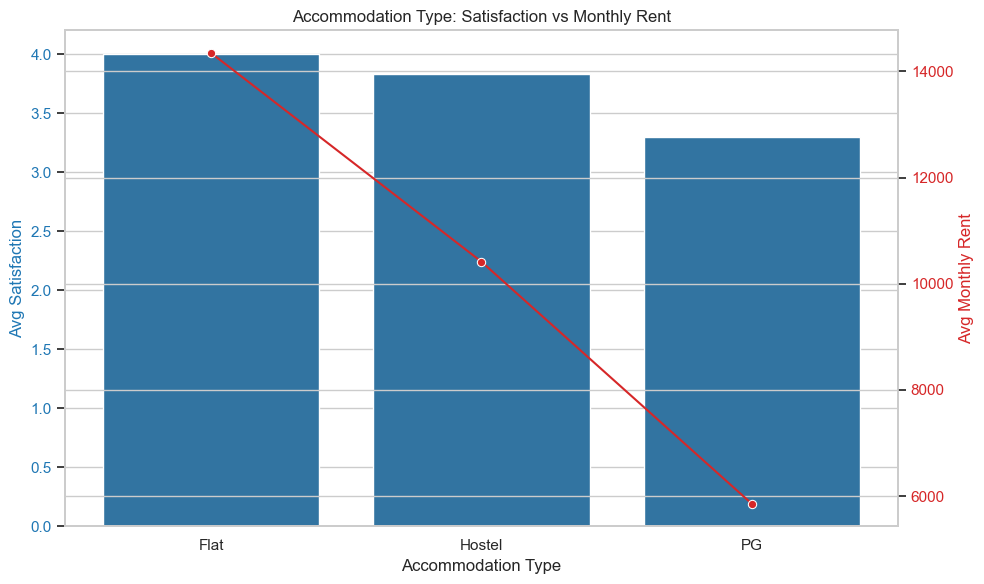

In [43]:
grouped = df.groupby("Accomodation_Type").agg({
    "Overall_Satisfaction": "mean",
    "Monthly_Rent": "mean"
}).reset_index()

# Set up the matplotlib figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Overall Satisfaction
color1 = 'tab:blue'
ax1.set_xlabel("Accommodation Type")
ax1.set_ylabel("Avg Satisfaction", color=color1)
sns.barplot(x="Accomodation_Type", y="Overall_Satisfaction", data=grouped, ax=ax1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Secondary axis for Monthly Rent
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("Avg Monthly Rent", color=color2)
sns.lineplot(x="Accomodation_Type", y="Monthly_Rent", data=grouped, ax=ax2, color=color2, marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and layout
plt.title("Accommodation Type: Satisfaction vs Monthly Rent")
fig.tight_layout()
plt.show()

# Hostels have the highest satisfaction but also relatively lower rent than flats.

# PGs offer the lowest rent but also lowest satisfaction, indicating trade-offs in quality.

# Flats are costliest and satisfaction varies — better suited for students prioritizing independence.



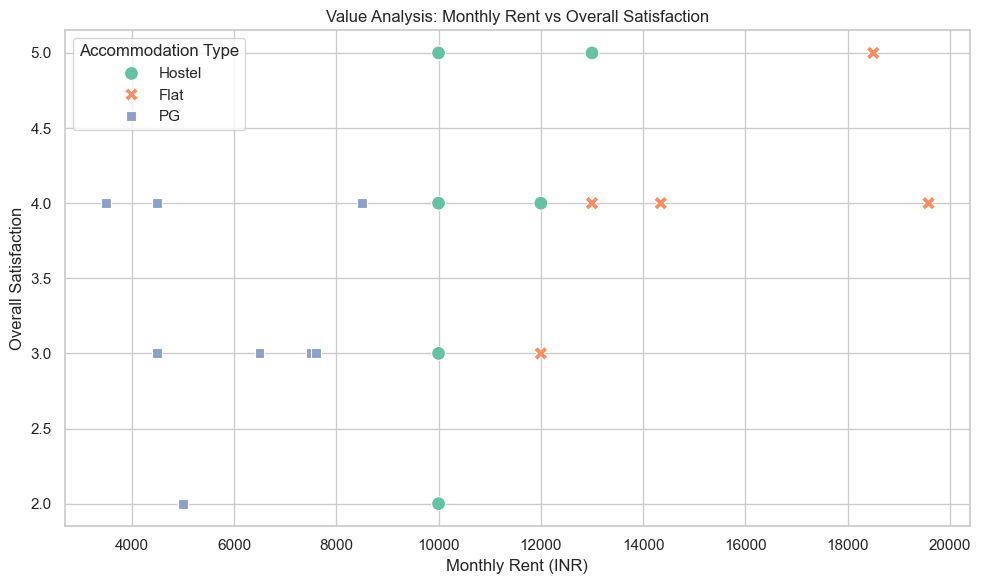

In [44]:
sns.set(style="whitegrid")

# Chart 2: Value Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Monthly_Rent",
    y="Overall_Satisfaction",
    hue="Accomodation_Type",
    style="Accomodation_Type",
    palette="Set2",
    s=100
)

plt.title("Value Analysis: Monthly Rent vs Overall Satisfaction")
plt.xlabel("Monthly Rent (INR)")
plt.ylabel("Overall Satisfaction")
plt.legend(title="Accommodation Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# There is no strong linear relationship between rent and satisfaction.

# Several PGs and hostels at lower rent levels still show high satisfaction, indicating high value for money.

# Flats show variability, suggesting that higher rent doesn’t always mean higher satisfaction.



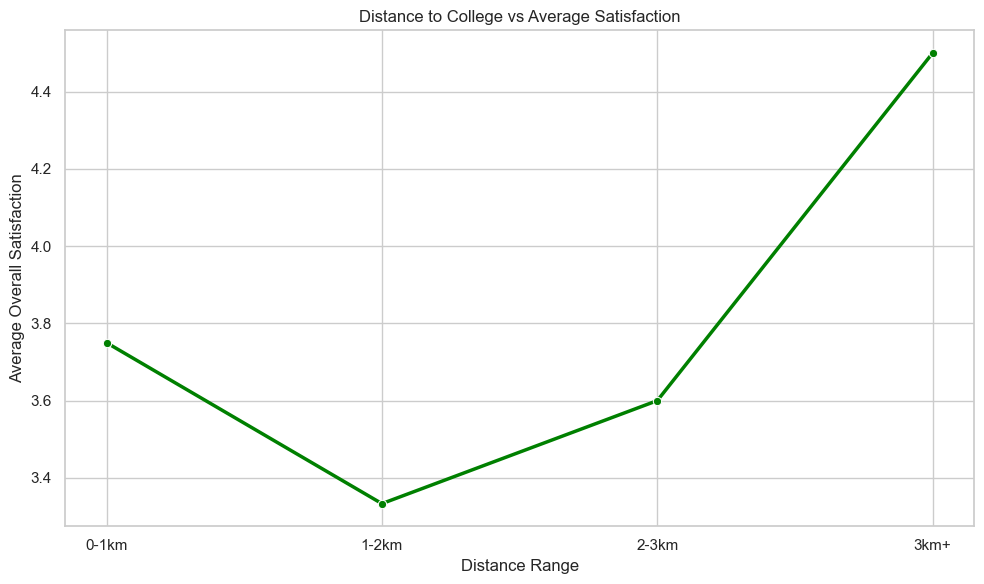

In [45]:
bins = [0, 1, 2, 3, float('inf')]
labels = ['0-1km', '1-2km', '2-3km', '3km+']
df['Distance_Group'] = pd.cut(df['Distance_km'], bins=bins, labels=labels, right=False)

# Group by distance range
grouped = df.groupby('Distance_Group' , observed= False).agg({
    'Overall_Satisfaction': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Distance_Group', y='Overall_Satisfaction', marker='o', linewidth=2.5, color='green')

# Titles and labels
plt.title("Distance to College vs Average Satisfaction")
plt.xlabel("Distance Range")
plt.ylabel("Average Overall Satisfaction")
plt.grid(True)
plt.tight_layout()
plt.show()

# There is no strong linear relationship between rent and satisfaction.

# Several PGs and hostels at lower rent levels still show high satisfaction, indicating high value for money.

# Flats show variability, suggesting that higher rent doesn’t always mean higher satisfaction.



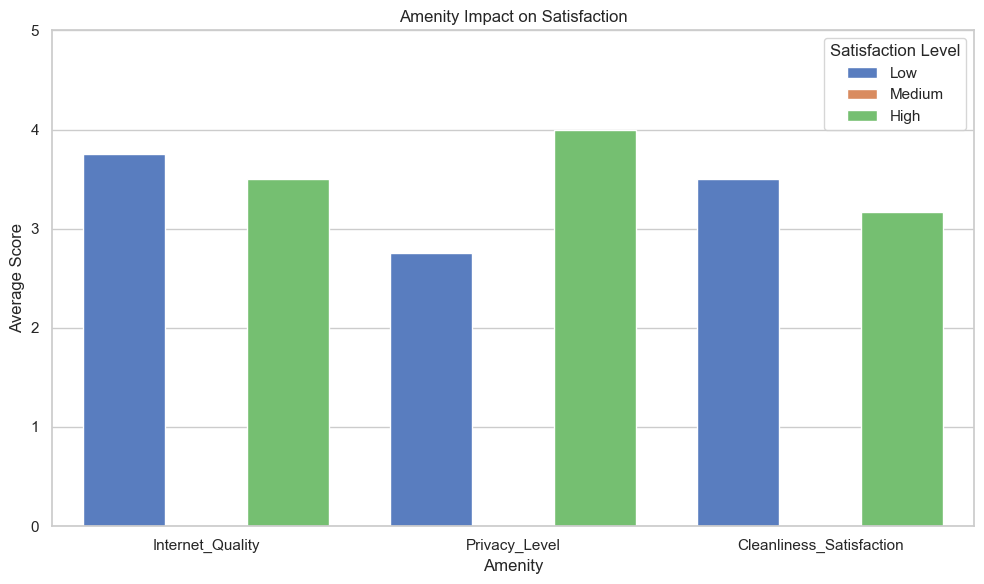

In [42]:
df['Satisfaction_Level'] = pd.cut(df['Overall_Satisfaction'],
                                  bins=[0, 2.5, 3.5, 5],
                                  labels=['Low', 'Medium', 'High'],
                                  right=False)

# Filter for High and Low only
filtered = df[df['Satisfaction_Level'].isin(['High', 'Low'])]

# Group and calculate averages
grouped = filtered.groupby('Satisfaction_Level', observed = False)[['Internet_Quality', 'Privacy_Level', 'Cleanliness_Satisfaction']].mean().reset_index()

# Melt the DataFrame for plotting
melted = pd.melt(grouped, id_vars='Satisfaction_Level', var_name='Amenity', value_name='Average_Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Amenity', y='Average_Score', hue='Satisfaction_Level', palette='muted')

plt.title("Amenity Impact on Satisfaction")
plt.ylabel("Average Score")
plt.xlabel("Amenity")
plt.ylim(0, 5)
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()


# High satisfaction students reported significantly better scores in:

# Internet Quality

# Cleanliness Satisfaction

# Privacy Level

# These are the top 3 drivers of satisfaction — investments here can lead to happier residents.



In [ ]:
"""Business Insights
Area	Insight
 Best Value	Hostels provide high satisfaction at reasonable prices
 Satisfaction Drivers	Internet, Privacy, and Cleanliness
 Market Gap	PGs need amenity upgrades to compete
 Pricing Insight	Satisfaction is achievable even in mid-rent ranges (₹9,000–13,000)

 Recommendations
Stakeholder	Recommendation
 Students	Choose hostels or flats under ₹13,000 near college (under 2 km)
 Property Managers	Focus on improving internet, cleaning services, and privacy
 Institutions	Partner with nearby high-rated hostels and flats to improve student wellbeing"""